In [2]:
import pandas  as pd
import numpy as np

In [3]:
X_train=train.iloc[:,:-1]
y_train=train.iloc[:,-1]
X_test=test.iloc[:,:-1]
y_test=test.iloc[:,-1]

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [5]:
# 创建多层感知器分类器
mlp = MLPClassifier(max_iter=1000, random_state=42)

In [6]:
# 设置要搜索的参数范围
param_grid = {
    'hidden_layer_sizes': [(10,), (20,), (10, 10), (20, 10), (10, 20)],  # 隐藏层大小
    'activation': ['tanh', 'relu'],  # 激活函数
    'solver': ['adam', 'sgd'],  # 优化算法
    'alpha': [0.0001, 0.001, 0.01],  # L2惩罚项
    'learning_rate': ['constant', 'adaptive']  # 学习率调节策略
}

In [7]:
# 创建网格搜索
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=1)

In [8]:
# 拟合模型
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000, random_state=42),
             n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.001, 0.01],
                         'hidden_layer_sizes': [(10,), (20,), (10, 10),
                                                (20, 10), (10, 20)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['adam', 'sgd']},
             verbose=1)

In [9]:
# 输出最佳参数
print("最佳参数：", grid_search.best_params_)

最佳参数： {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (10,), 'learning_rate': 'constant', 'solver': 'adam'}


In [10]:
# 用最佳参数的模型在测试集上进行预测
best_mlp_clf = grid_search.best_estimator_

In [11]:
from sklearn.metrics import classification_report

# 预测测试集
y_pred =best_mlp_clf.predict(X_test)

# 输出模型报告， 查看评价指标
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91       282
           1       0.00      0.00      0.00        55

    accuracy                           0.83       337
   macro avg       0.42      0.50      0.45       337
weighted avg       0.70      0.83      0.76       337



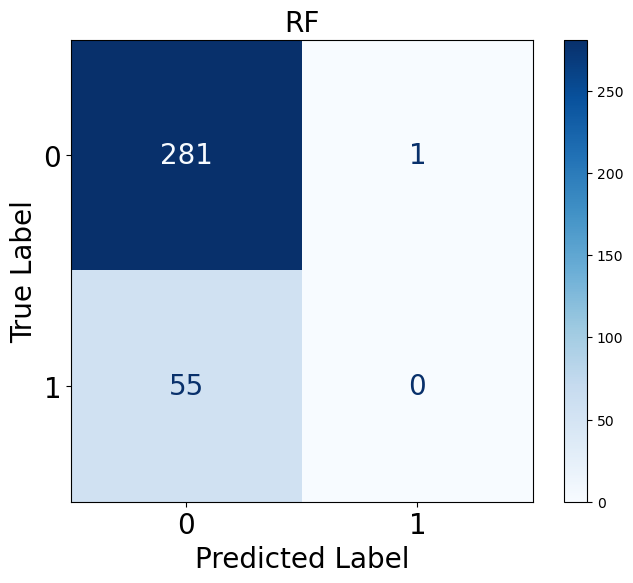

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
# 计算混淆矩阵
confusion_matrix_model = confusion_matrix(y_test, y_pred)
# 使用 ConfusionMatrixDisplay 绘制混淆矩阵热力图
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_model)
fig, ax = plt.subplots(figsize=(8, 6))  # 可以调整图的大小
cm_display.plot(cmap='Blues', ax=ax, values_format='d')

# 修改数字字体大小
for texts in ax.texts:
    texts.set_fontsize(20)

# 设置图形标签和标题
plt.title('RF', fontsize=20)
plt.xlabel('Predicted Label', fontsize=20)
plt.ylabel('True Label', fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

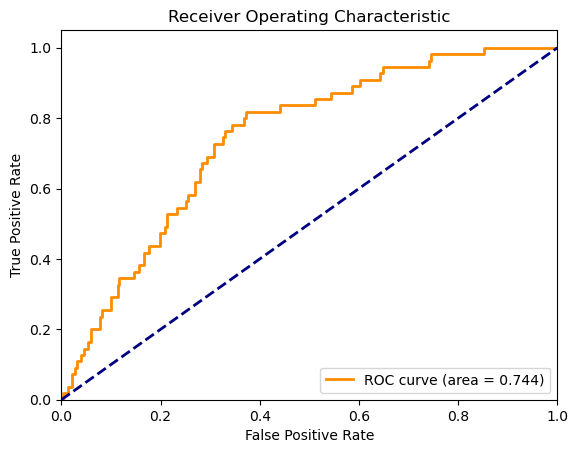

In [14]:
from sklearn.metrics import roc_curve, auc
# 预测概率
y_score = best_mlp_clf.predict_proba(X_test)[:, 1]
# 计算ROC曲线
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_score)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)
# 绘制ROC曲线
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label='ROC curve (area = %0.3f)' % roc_auc_logistic)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()